# Writing our first classifier - Google ML YouTube tutorials

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
x = iris.data
y = iris.target

In [4]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5)

An example of a basic classifier, that just randomly guesses labels. As there are only three possible labels, the accuracy should be around 33%.

In [5]:
import random 

class ScrappyKNN():
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    
    def predict(self, x_test):
        predictions = []
        for row in x_test:
            label = random.choice(self.y_train)
            predictions.append(label)
        return predictions
        

In [6]:
from sklearn import tree
my_classifier = ScrappyKNN()

my_classifier.fit(x_train, y_train)

predictions = my_classifier.predict(x_test)

In [7]:
from sklearn.metrics import accuracy_score
print accuracy_score(y_test, predictions)

0.306666666667


## K-nearest neighbour classifier

A basic classifier would work by separating the features on a grid by a line, and classifying based upon which group of features it seem to fall under. In some cases, however, a feature might be appear to belong to neither set. In this case, the K-nearest neighbours classifier becomes useful. *K* refers to the number of neighbours it is close to. The value of *k* is typically a user defined constant.

In its simplest form, a KNN classifier will compute the Euclidean distance between the test sample and the training sample points. The group of sample points, to which there are a *k* number of points closest to the test point is chosen as the label for the test point. If these sample points are imagined as a point on a grid, the axes form the different features of the training sample points. Thus, a training set with 3 features would require a 3D box, and a 4-feature set a hypercube. This makes it harder to visualise, but the Euclidean distance equation remains simple:

$$
d(a, b) = \sqrt{(x_{2} - x_{1})^{2} + (y_{2} - y_{1})^{2} +...+ (n_{2} - n_{1})^{2})}
$$

A simple KNN classifier will be coded below, using a value of *k* of 1.

In [8]:
from scipy.spatial import distance 

def euc(a, b):
    """
    Returns Euclidean distance between point a,
    the training data, and b, the point from our
    test data
    """
    return distance.euclidean(a, b)

class SimpleKNN():
    

    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    
    def predict(self, x_test):
        predictions = []
        for row in x_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row):
        best_dist = euc(row, self.x_train[0])
        best_index = 0
        
        for i in range(1, len(self.x_train)):
            dist = euc(row, self.x_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
        
        return self.y_train[best_index]
        
    

In [9]:
from sklearn import tree
classifier_KNN = SimpleKNN()

classifier_KNN.fit(x_train, y_train)

predictions = classifier_KNN.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score
print accuracy_score(y_test, predictions)

0.946666666667


## Writing a KNN classifier with a value of *k* > 1

In [64]:
from scipy.spatial import distance 
import numpy as np
import pandas as pd

def euc(a, b):
    """
    Returns Euclidean distance between point a,
    the training data, and b, the point from our
    test data
    """
    return distance.euclidean(a, b)

euc_apply = np.vectorize(euc)

class CustomKNN():
    
    def __init__(self, labels, k):
        self.labels = labels
        self.k = k
        
    
    def fit(self, x_train, y_train):
        self.x_train = np.array(x_train)
        self.y_train = np.array(y_train)
        
        training_data = pd.DataFrame(x_train)
        training_targets = pd.DataFrame(y_train, columns=['Target'])
        df = pd.concat([training_data, training_targets], axis=1)
        df.sort_values('Target', inplace=True)
        
        self.targets = map(int, df['Target'].unique().tolist())
        
        self.trainIndexSortedByTarget = [0] * len(self.targets)
        
        for target in self.targets:
            indx_vals = df.loc[df['Target'] == target].index.tolist()
            self.trainIndexSortedByTarget[target] = indx_vals
            
        
    
    def predict(self, x_test, k=None):
        if k == None:
            k = self.k
        
        predictions = []
        for row in x_test:
            label = self.closest(row, k)
            predictions.append(label)
        return predictions
    
    
    def closest(self, row, k):
        best_distance = euc(row, self.x_train[0])
        best_index = 0
        
        distByTarget = [0] * len(self.targets)
        
        for target in self.targets:
            targetDistances = []
            
            for index in self.trainIndexSortedByTarget[target]:
                dist = euc(row, self.x_train[index])
                targetDistances.append(dist)
            
            distByTarget[target] = sorted(targetDistances)
             
        bestTarget = 0
        shortestDistance = 100
        
        for target in self.targets:
            k_closest = distByTarget[target][0:k]
            avgDist = reduce(lambda a, b: ((a+b)/float(k)), k_closest)
            if avgDist < shortestDistance:
                shortestDistance = avgDist
                bestTarget = target
           
        return bestTarget
        
    

In [65]:
from sklearn import tree
from sklearn.metrics import accuracy_score

accuracies = []

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5)

for k in range(1,25):
    customClassifier = CustomKNN(iris.target_names, k)
    customClassifier.fit(x_train, y_train)
    predictions = customClassifier.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)

    accuracies.append(accuracy)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5)


customClassifier = CustomKNN(iris.target_names, 3)
customClassifier.fit(x_train, y_train)
predictions = customClassifier.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

print accuracy

0.973333333333


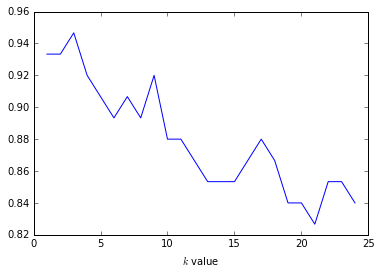

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

k_value = range(1, 25)
plt.plot(k_value,accuracies)
plt.xlabel("$k$ value")